In [1]:
%pip install phe


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:

from phe import paillier
public_key, private_key = paillier.generate_paillier_keypair(n_length=1024)

In [3]:
import copy
import random
import pandas as pd
import concurrent.futures
import time
from phe import EncryptedNumber

## Algorithm

Cloud A
Input: Encrypted Dataset, Query, Public Key
Intermidiate: Send Diff to Cloud B
Output: SSED

Cloud B
Input: Diff, public key, private key
Output: Diff2 = for all i: Diff[i] ** decr(Diff[i])

## Encrypt the dataset

In [70]:
# Example usage:

class SampleDataset : 

    def __init__(self ,data , query) -> None:
        self.data = data
        self.query = query
    
    def process(self)  : 
        self.all_labels = list(set(row[-1] for row in self.data))
        
    def encrypt(self) : 
        self.data  = [[public_key.encrypt(val) for val in row] for row  in self.data]
        self.query = [public_key.encrypt(val) for val in self.query]
        self.all_labels = [public_key.encrypt(val) for val in self.all_labels]

sample_data = [[1, 2, 3 , 0], [4, 5, 6 , 0], [7, 8, 9 , 0] , [1,5,6,1] , [2,5,8,1] , [3,7,1,1] , [9,4,6,1]]
sample_query = [2, 3, 6]
sample = SampleDataset(sample_data ,sample_query)
sample.process()
sample.encrypt()

[0, 1]


In [ ]:
from sklearn import datasets

iris_dataset = datasets.load_iris()
iris_query = [6.0,4.8, 5.2,3,1]

class IrisDataset : 

    def __init__(self ,dataset , query) -> None:
        self.dataset = dataset
        self.query = query
    
    def process(self)  : 
        self.data =  self.dataset.data.tolist()
        for i in range(len(self.data)):
            self.data[i].append(int(self.dataset.target[i]))   
        self.all_labels = list(set(row[-1] for row in self.data))

        
    def encrypt(self) : 
        self.data  = [[public_key.encrypt(val) for val in row] for row in self.data]
        self.query = [public_key.encrypt(val) for val in self.query]
        self.all_labels = [public_key.encrypt(val) for val in self.all_labels]

iris_model = IrisDataset(iris_dataset ,iris_query)
iris_model.process()
iris_model.encrypt()


In [ ]:
breast_cancer_enn = pd.read_csv('./datasets/breast_cancer_SMOTE_ENN.csv', index_col=None)
breast_cancer_enn_query = breast_cancer_enn.iloc[72, :-1]

class BreastCancerDataset : 

    def __init__(self ,data , query) -> None:
        self.data = data
        self.query = query
    
    def process(self)  : 
        self.query = self.query.tolist()
        self.data =  self.data.values.tolist()
        # print(self.data[72])
        for row in self.data : 
            row[-1] = int(row[-1])
        self.all_labels = list(set(row[-1] for row in self.data))
        
    def encrypt(self) : 
        self.data  = [[public_key.encrypt(val) for val in row] for row in self.data]
        self.query = [public_key.encrypt(val) for val in self.query]
        self.all_labels = [public_key.encrypt(val) for val in self.all_labels]

breast_cancer_model = BreastCancerDataset(breast_cancer_enn ,breast_cancer_enn_query)
breast_cancer_model.process()
# print(breast_cancer_enn)
breast_cancer_model.encrypt()

In [21]:
car = pd.read_csv('./datasets/car.csv' ,index_col=None)
car_query = car.iloc[72, :-1]

class CarDataset : 

    def __init__(self ,data , query) -> None:
        self.data = data
        self.query = query
    
    def process(self)  : 
        self.query = self.query.tolist()
        self.data =  self.data.values.tolist()
        for row in self.data : 
            row[-1] = int(row[-1])
        self.all_labels = list(set(row[-1] for row in self.data))
        
    def encrypt(self) : 
        self.data  = [[public_key.encrypt(val) for val in row] for row in self.data]
        self.query = [public_key.encrypt(val) for val in self.query]
        self.all_labels = [public_key.encrypt(val) for val in self.all_labels]

car_model = CarDataset(car ,car_query)
car_model.process()
# car_model.encrypt()

car

[[1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 2, 1], [1, 1, 1, 1, 1, 3, 1], [1, 1, 1, 1, 2, 1, 1], [1, 1, 1, 1, 2, 2, 1], [1, 1, 1, 1, 2, 3, 1], [1, 1, 1, 1, 3, 1, 1], [1, 1, 1, 1, 3, 2, 1], [1, 1, 1, 1, 3, 3, 1], [1, 1, 1, 2, 1, 1, 1], [1, 1, 1, 2, 1, 2, 1], [1, 1, 1, 2, 1, 3, 1], [1, 1, 1, 2, 2, 1, 1], [1, 1, 1, 2, 2, 2, 1], [1, 1, 1, 2, 2, 3, 1], [1, 1, 1, 2, 3, 1, 1], [1, 1, 1, 2, 3, 2, 1], [1, 1, 1, 2, 3, 3, 1], [1, 1, 1, 3, 1, 1, 1], [1, 1, 1, 3, 1, 2, 1], [1, 1, 1, 3, 1, 3, 1], [1, 1, 1, 3, 2, 1, 1], [1, 1, 1, 3, 2, 2, 1], [1, 1, 1, 3, 2, 3, 1], [1, 1, 1, 3, 3, 1, 1], [1, 1, 1, 3, 3, 2, 1], [1, 1, 1, 3, 3, 3, 1], [1, 1, 2, 1, 1, 1, 1], [1, 1, 2, 1, 1, 2, 1], [1, 1, 2, 1, 1, 3, 1], [1, 1, 2, 1, 2, 1, 1], [1, 1, 2, 1, 2, 2, 1], [1, 1, 2, 1, 2, 3, 1], [1, 1, 2, 1, 3, 1, 1], [1, 1, 2, 1, 3, 2, 1], [1, 1, 2, 1, 3, 3, 1], [1, 1, 2, 2, 1, 1, 1], [1, 1, 2, 2, 1, 2, 1], [1, 1, 2, 2, 1, 3, 1], [1, 1, 2, 2, 2, 1, 1], [1, 1, 2, 2, 2, 2, 1], [1, 1, 2, 2, 2, 3, 1], [1, 1, 2, 2, 3, 1, 1], [1, 1, 2, 

,buying,maint,doors,persons,lug_boot,safety,classes
0,1,1,1,1,1,1,1
1,1,1,1,1,1,2,1
2,1,1,1,1,1,3,1
3,1,1,1,1,2,1,1
4,1,1,1,1,2,2,1
...,...,...,...,...,...,...,...
1723,4,4,4,3,2,2,3
1724,4,4,4,3,2,3,4
1725,4,4,4,3,3,1,1
1726,4,4,4,3,3,2,3


In [1]:

arrhythmia = pd.read_csv('./datasets/arrhythmia_pca_BDS.csv', index_col=None)
arrhythmia_query= arrhythmia.iloc[140, :-1]

class ArrhythmiaDataset : 

    def __init__(self ,data , query) -> None:
        self.data = data
        self.query = query
    
    def process(self)  : 
        self.query = self.query.tolist()
        self.data =  self.data.values.tolist()
        for row in self.data : 
            row[-1] = int(row[-1])
        self.all_labels = list(set(row[-1] for row in self.data))
        
    def encrypt(self) : 
        self.data  = [[public_key.encrypt(val) for val in row] for row in self.data]
        self.query = [public_key.encrypt(val) for val in self.query]
        self.all_labels = [public_key.encrypt(val) for val in self.all_labels]

arrhythmia_model = ArrhythmiaDataset(arrhythmia ,arrhythmia_query)
arrhythmia_model.process()
arrhythmia_model.encrypt()

NameError: name 'pd' is not defined

### Randomization

In [22]:
def randomize(a ,ra) :
  if isinstance(a ,list) :
    ans = []
    for i in range(len(a)) :
      ans.append(a[i]+ra)
    return ans
  else :
    ans = a + ra
    return ans


### Derandomization

In [23]:
def derandomize(a, ra):

  if isinstance(a ,list) :
    ans = []
    for i in range(len(a)) :
      ans.append(a[i] - ra)
    return ans
  else :
    ans = a - ra
    return ans

def derandomize_mult(a,b,ra,rb,mult_res) :
  n = public_key.n
  a_rb = a * rb
  b_ra = b * ra
  ra_rb = ra*rb
  
  mult_res = mult_res - a_rb
  mult_res = mult_res - b_ra
  mult_res = mult_res - ra_rb
  return mult_res

## SM

In [24]:

def SM_P2(ad, bd):

  ha = private_key.decrypt(ad)
  hb = private_key.decrypt(bd)

  h = (ha * hb) % public_key.n
  hd = public_key.encrypt(h)

  return hd

In [25]:
def SM_P1(a, b):

  ra = random.getrandbits(25)
  rb = random.getrandbits(25)

  ad = randomize(a , ra)
  bd = randomize(b , rb)
  hd = SM_P2(ad, bd)
  res = derandomize_mult(a,b,ra,rb,hd )
  return res

## SSED

In [26]:


def SSED(P, Q):
    squared_dist = []
    
    records = P if isinstance(P[0] , list) else [P]
    # cnt = 1
    
    for row in records :     
            
        diff , diff2 = [] , []
        for i in range(len(row) - 1) : 
            diff.append(row[i] - Q[i])
        diff2 = [SM_P1(x,x) for x in diff]
        tot_dist = public_key.encrypt(0)
        for i in diff2:
            tot_dist = tot_dist + i
        squared_dist.append(tot_dist)
        # print("Completed row " ,cnt)
        # cnt = cnt + 1
    return squared_dist


## SELIM

In [27]:
def SELIM_C2(distance_label , E_maxVal , E_zero) :
    found = 0
    distance_to_add = []
    for d in distance_label :
        decrypt_d = private_key.decrypt(d[1])
        if decrypt_d or found :
            distance_to_add.append(E_zero)
        else  :
            found = 1
            distance_to_add.append(E_maxVal)
    return distance_to_add

In [28]:
def SELIM_C1(distance_label  , mn ) :
    # Substracting all distances from minimum
    res = []
    for i in range(len(distance_label)) :
        distance_label[i][1] = (distance_label[i][1] - mn[1]) 
        res.append(distance_label[i])

    return res


In [29]:
def SELIM(distance_label ,mn ,max_val) :
    distance_label2 = copy.deepcopy(distance_label)
    updated_distance_label1 = SELIM_C1(distance_label2 , mn)

    distance_to_add = SELIM_C2(updated_distance_label1 , public_key.encrypt(max_val) ,public_key.encrypt(0))
    for i in range(len(distance_label2)) :
        distance_label[i][1] = (distance_label[i][1] + distance_to_add[i])
    return distance_label2


Testing SELIM

In [ ]:
distance_label = [[1,2,3] ,[4,5,6] , [7,2,9]]
distance_label = [[public_key.encrypt(d) for d in label] for label in distance_label]
mn = [1,2,3]
mn = [public_key.encrypt(d) for d in mn]
max_val = 100
distance_label = SELIM(distance_label, mn ,max_val)



## SMIN

In [13]:
# think about merge sort for smin as parallel processing can be encorporated


In [30]:
import random

# Assume you have implemented encrypt and decrypt functions

# initialize it

r = 0

def SMIN_C2(a, b):
    distance_1 = private_key.decrypt(a[1])
    distance_2 = private_key.decrypt(b[1])
    
    if distance_1 <= distance_2 : 
        return a 
    else : 
        return b


def prepare_distance_label(dist, data):
    distance_label = []
    # encrypting all tuple elements
    for i in range(len(dist)):
        r_id = public_key.encrypt(i)
        r_dist = dist[i]
        r_clabel = data[i][-1]
        distance_label.append([r_id, r_dist, r_clabel])

    return distance_label


def KMIN_C1(distance_label, k):
    knearest = []

    for i in range(k):
        nearest = find_nearest_C1(distance_label)
        # 100 is just written for sample example , please use appropriate max value for this
        knearest.append(nearest)
        SELIM(distance_label , nearest, 1000000000)

    return knearest


def find_nearest_C1(distance_label):
    mn = distance_label[0]
    sz = len(distance_label)
    for i in range(1 ,sz):
        r = random.getrandbits(50)
        mn = randomize(mn ,r )
        curr = randomize(distance_label[i] , r)
        mn = SMIN_C2(mn, curr)
        mn = derandomize(mn ,r )
    return mn

def compare(a,b) : 
    r = random.getrandbits(50)
    curr = randomize(a ,r )
    next = randomize(b, r)
    res = SMIN_C2(curr, next)
    res = derandomize(res ,r )
    return res

def find_nearest_C1_parallel(distance_label):

    sz = len(distance_label)
    if sz == 1 : 
        return distance_label[0]
    new_list = []
    if sz & 1 : 
        last_label = distance_label.pop(-1)
        new_list.append(last_label)
        sz = sz  - 1
    
    with concurrent.futures.ProcessPoolExecutor() as executor  :
        for r in executor.map(compare ,[distance_label[i] for i in range(sz) if i % 2 == 0] ,[distance_label[i] for i in range(sz) if i & 1]) : 
            new_list.append(r)

    return find_nearest_C1_parallel(new_list)




## SF


In [31]:

class Shuffle : 

    def __init__(self , data) -> None:
        n = len(data)
        self.block_size = random.randint(2,len(data))
        self.rotation_amount = []
        for i in range(((n + self.block_size - 1)//self.block_size)) :
            r = min(i * self.block_size + self.block_size ,len(data) )
            l = i * self.block_size
            currLen = r - l 
            self.rotation_amount.append(random.randint(1, currLen))
        self.rotation_full = random.randint(0 , len(data) - 1) 


    def shuffle(self , data) -> None:
        
        i = 0 
        while i < len(data) : 
            j = min(len(data) , i + self.block_size )
            ind = (j-1)//self.block_size
            k = j - self.rotation_amount[ind]
            data[i : j] = data[k : j] + data[i : k]
            i = j

        data[:] = data[-self.rotation_full:] + data[:-self.rotation_full]

    def deshuffle(self , data) -> None : 
        i = 0 
        data[:] = data[self.rotation_full:] + data[:self.rotation_full]
        while i < len(data) : 
            j = min(len(data) , i + self.block_size )
            ind = (j-1)//self.block_size
            k = self.rotation_amount[ind]
            data[i : j] = data[i + k : j] + data[i :i + k]
            i = j



In [32]:
def SF_P1(k_nearest_labels, all_labels):
    k = len(k_nearest_labels)
    w = len(all_labels)

    S = [[all_labels[j] - k_nearest_labels[i] for j in range(w)] for i in range(k)]

    shuffle_obj_list = [Shuffle(row) for row in S]

    for row,shuffle_obj in zip(S ,shuffle_obj_list) : 
        shuffle_obj.shuffle(row)

    U = SF_P2(S)

    for row,shuffle_obj in zip(U ,shuffle_obj_list) : 
        shuffle_obj.deshuffle(row)

    res = []
    for j in range(w):
        freq = sum(U[i][j] for i in range(k))
        res.append([all_labels[j], freq])
    return res

def SF_P2(S):
    k = len(S)
    w = len(S[0])

    U = [[0 for _ in range(w)] for _ in range(k)]
    for i in range(k):
        for j in range(w):
            if private_key.decrypt(S[i][j]) == 0:
                U[i][j] = public_key.encrypt(1)
            else:
                U[i][j] = public_key.encrypt(0)

    return U

def SF(knearest_labels ,all_labels) : 
    freq_list = SF_P1(knearest_labels ,all_labels)
   
    return freq_list

## SMAX

In [33]:
def SMAX_P1(freq_labels):
    k = len(freq_labels)
    
    mx = freq_labels[0]
    for i in range(1, k):
        r = random.getrandbits(50)

        mx = randomize(mx, r)
        r_cur = randomize(freq_labels[i], r)
        mx = SMAX_P2(mx, r_cur)
        mx = derandomize(mx, r)
    
    return mx

def SMAX_P2(a, b):
    da = private_key.decrypt(a[1])
    db = private_key.decrypt(b[1])

    if da < db:
        return b
    else:
        return a
    

def SMAX(freq_labels) : 
    return SMAX_P1(freq_labels)


## SDMCL

In [34]:



def SDMCL_P1(knearest_labels, all_labels):
    freq_labels = SF(knearest_labels, all_labels)
    
    max_label, max_label_freq = SMAX(freq_labels)

    return SDMCL_P2(max_label)
    # send_to_user(r)

def SDMCL_P2(r_q_label):
    return r_q_label

def prepare_knearest_labels(knearest_labels):
    return [item[2] for item in knearest_labels]

def SDMCL(knearest_labels , all_labels) : 
    knearest_labels = prepare_knearest_labels(knearest_labels)
    final_class_label = SDMCL_P1(knearest_labels, all_labels)
    return final_class_label



## Driver Code

In [22]:
start = time.time()
# dist = SSED(iris_model.data ,iris_model.query)


(455, 32)

In [35]:
def KNN(enc_data, enc_query , k ,all_labels) : 
    queries = [enc_query] *  len(enc_data)
    start = time.time()
    with concurrent.futures.ProcessPoolExecutor() as executor  :
        result =  executor.map(SSED ,enc_data ,queries)
    dist = []
    end = time.time()
    print(f"Finished SSED in {end-start} second(s)")
    for r in result : 
        dist.append(r[0])
    distance_label = prepare_distance_label(dist ,enc_data)
    start = time.time()
    knearest_labels = KMIN_C1(distance_label, k)
    end = time.time()
    print(f"Finished KMIN in {end-start} second(s)")
    print("KMIN :")
    for labels in knearest_labels : 
        print([private_key.decrypt(ele) for ele in labels])

KNN(arrhythmia_model.data ,arrhythmia_model.query ,11 ,arrhythmia_model.all_labels)

Finished SSED in 118.98081851005554 second(s)
Finished KMIN in 71.9996976852417 second(s)
KMIN :
[140, 0.0, 1]
[333, 15001.816700668543, 0]
[65, 17834.821968047298, 1]
[267, 19681.298549199237, 0]
[344, 20312.51413331425, 0]
[244, 21296.849228619176, 1]
[141, 21422.50930016057, 1]
[328, 21665.053933551895, 1]
[121, 22378.865363300985, 0]
[154, 22543.507401867184, 0]
[269, 22979.478718501086, 0]


## Testing with parallel

In [ ]:

start = time.time()
dist = SSED(iris_model.data ,iris_model.query)
end =  time.time() 
print(f'Finised in {end-start} second(s)')


In [19]:
model_name = iris_model
records = [row for row in model_name.data]
queries = [model_name.query for _ in range(len(records))]
start = time.time() 
with concurrent.futures.ProcessPoolExecutor() as executor  :
    result =  executor.map(SSED ,records ,queries)
end = time.time()
print(f'Finised in {end-start} second(s)')

Finised in 4.184199333190918 second(s)


In [20]:
dist = []
for r in result : 
    dist.append(r[0])

In [21]:
for d in dist :
    print(private_key.decrypt(d))

24.77031250546218
26.618749987567256
27.256249991630447
26.34687500801886
24.73906249410958
19.924999986525158
25.720703142643217
24.475000002008972
28.437109372733772
26.397265616094476
23.103124985929448
24.23593751076324
27.465625008726974
31.412500007678123
24.52500000255784
20.75205074906515
23.118749979940716
24.187890629599174
20.601562501845066
22.821875015466855
22.378124992562
22.517187510002742
28.900000005755572
21.556250021180205
22.14765625943471
25.010937499062806
22.672656246383543
23.880273437055855
24.831250001442083
24.88281248928841
25.149999997293573
22.67656249587978
23.295312508019443
22.88124999777243
25.723828100185663
27.37246093915511
24.91874999483433
25.526171862594627
28.843749979144555
24.293750012084203
25.21406250148828
31.05625000411614
28.173046869825058
21.415624995086066
19.35000001542264
26.475781261841735
22.575000010747893
26.85351564445666
23.139062489111595
25.506250005374287
6.243749983662285
5.460937484608376
6.064453104743233
10.856250003015

In [52]:
distance_label = prepare_distance_label(dist ,model_name.data)

In [53]:
knearest_labels = KMIN_C1(distance_label, 11)

In [54]:
for kn in knearest_labels : 
    print(private_key.decrypt(kn[1]))

0.0
15002.111568129772
17834.95664536982
19681.219091801686
20312.62749765484
21296.790243130246
21422.262078015177
21664.773489142783
22379.03735917132
22543.403311816084
22979.185818242586


## Visualization

In [ ]:
# prompt: generate a graph by varying number of records vs KNN time required

import time

num_records = [10, 20, 30, 40, 50, 100, 150 ,200 ,250,300 ,len(breast_cancer_model.data)]
times = []

for num_rec in num_records:
    start_time = time.time()
    
    breast_cancer_model_part = breast_cancer_model.data[:num_rec]
    KNN(breast_cancer_model_part, breast_cancer_model.query ,11 , breast_cancer_model.all_labels)
    end_time = time.time()
    times.append(end_time - start_time)


In [18]:
times =[5.263193607330322, 9.352410554885864, 13.458998203277588, 17.571500062942505, 21.9779269695282, 42.67431163787842, 62.28234124183655, 93.5011465549469, 128.94074988365173, 160.02162671089172, 233.74342441558838]

num_records = [10, 20, 30, 40, 50, 100, 150 ,200 ,250,300 ,len(breast_cancer_model.data)]

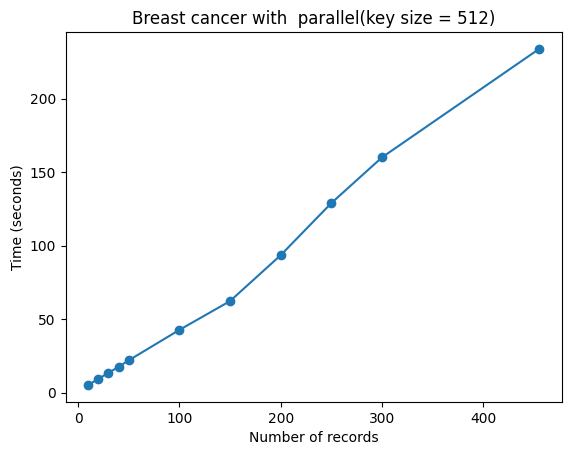

In [19]:
import matplotlib.pyplot as plt

plt.title('Breast cancer with  parallel(key size = 512)')
plt.plot(num_records, times, marker='o')
plt.xlabel("Number of records")
plt.ylabel("Time (seconds)")
plt.show()


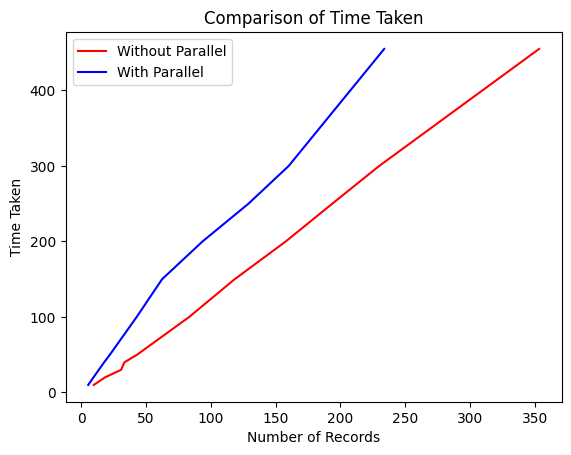

In [17]:
import matplotlib.pyplot as plt
x1 =[5.263193607330322, 9.352410554885864, 13.458998203277588, 17.571500062942505, 21.9779269695282, 42.67431163787842, 62.28234124183655, 93.5011465549469, 128.94074988365173, 160.02162671089172, 233.74342441558838]
x2 =  [9.59342074394226, 18.260001182556152, 30.66138768196106, 33.227577924728394, 42.983349084854126, 83.20676136016846, 118.30724263191223, 157.73038935661316, 193.63967394828796, 229.85996222496033, 353.3102741241455]
num_records = [10, 20, 30, 40, 50, 100, 150 ,200 ,250,300 ,len(breast_cancer_model.data)]

# plt.title('Comparsion between parallel and non parallel key size = 512')
fig, ax = plt.subplots()

# Plot the first dataset in red
ax.plot(x2, num_records, color='red', label='Without Parallel')

# Plot the second dataset in blue
ax.plot(x1, num_records, color='blue', label='With Parallel')

# Set labels and title
ax.set_xlabel('Number of Records')
ax.set_ylabel('Time Taken')
ax.set_title('Comparison of Time Taken')

# Add legend
ax.legend()

# Show the plot
plt.show()


In [ ]:
import matplotlib.pyplot as plt

plt.plot([1,3,5,7,9,11,13], times, marker='o')
plt.xlabel("K values")
plt.ylabel("Time (seconds)")
plt.show()
